In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control
import argparse
# plt.rcParams.update({
#     "text.usetex":True
# })

In [2]:
K = 0.2
num, den = [0.5,1], [1.5,0.5,1]

In [3]:
Gp = K*control.tf(num, den)

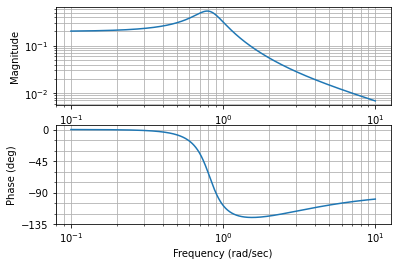

In [4]:
magnitude, phase, omega = control.bode(Gp)

In [5]:
w = np.logspace(-3, -3)

In [6]:
Gp = K*control.tf(num, den)

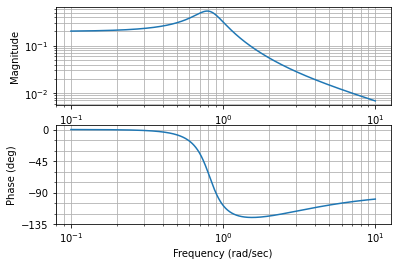

In [7]:
magnitude, phase, omega = control.bode(Gp)

In [8]:
(num,den) = control.pade(0.25,3)
Gp = control.tf(num,den)*Gp
print(Gp)


        -0.1 s^4 + 4.6 s^3 - 86.4 s^2 + 576 s + 1536
-------------------------------------------------------------
1.5 s^5 + 72.5 s^4 + 1465 s^3 + 1.205e+04 s^2 + 4800 s + 7680



In [9]:
print(Gp.den[0][0])

[1.5000e+00 7.2500e+01 1.4650e+03 1.2048e+04 4.8000e+03 7.6800e+03]


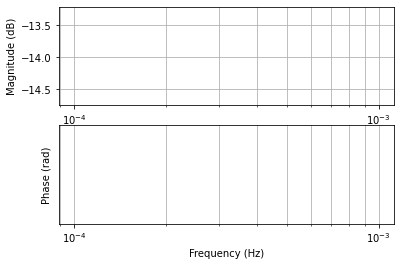

In [10]:
mag,phase,omega = control.bode(Gp,w,Hz=True,dB=True,deg=False)

# find the cross-over frequency and gain at cross-over

In [12]:
wc = np.interp(-180.0, np.flipud(phase), np.flipud(omega))
Kcu = np.interp(wc, omega, magnitude)

print('Crossover freq = ', wc, ' rad/sec')
print('Gain at crossover = ', Kcu)

Crossover freq =  0.001  rad/sec
Gain at crossover =  0.200000300000375


Text(0.5, 1.0, 'Crossover Frequency = 10 rad/sec')

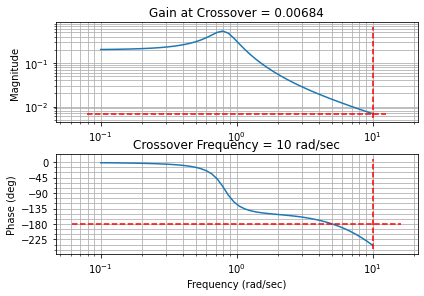

In [15]:
magnitude, phase, omega = control.bode(Gp, w)
plt.tight_layout()

ax1,ax2 = plt.gcf().axes

plt.sca(ax1)
plt.plot(plt.xlim(), [Kcu,Kcu], 'r--')
plt.plot([wc, wc], plt.ylim(), 'r--')
plt.title("Gain at Crossover = {0:.3g}".format(Kcu))

plt.sca(ax2)
plt.plot(plt.xlim(),[-180,-180],'r--')
plt.plot([wc,wc],plt.ylim(),'r--')
plt.title("Crossover Frequency = {0:.3g} rad/sec".format(wc))

Crossover freq =  10.0  rad/sec
Gain at crossover =  0.006840471135257433


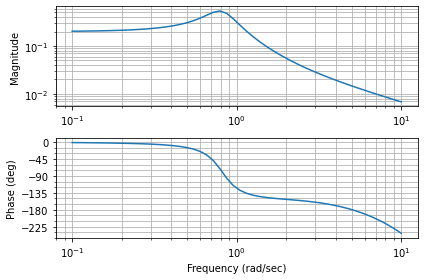

In [14]:
w = np.logspace(-1,1)
mag,phase,omega = control.bode(Gp,w);
plt.tight_layout()

# find the cross-over frequency and gain at cross-over
wc = np.interp(-180.0,np.flipud(phase),np.flipud(omega))
Kcu = np.interp(wc,omega,mag)

print('Crossover freq = ', wc, ' rad/sec')
print('Gain at crossover = ', Kcu)